<a href="https://colab.research.google.com/github/paria-nasri/wine/blob/main/wine%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Multiclass Classification with PyCaret**

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Install Pycaret**

In [42]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [43]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

**Import Libraries**

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

Three different wheat types, Kama, Rosa, and Canadian, each with 70 elements, were randomly chosen for the experiment, and made up the studied group. Using a soft X-ray approach, high quality visualisation of the interior kernel structure was found. Compared to other, more advanced imaging techniques like scanning microscopy or laser technology, it is non-destructive and far less expensive. The photos were captured on X-ray KODAK plates measuring 13x18 cm. Wheat grain from experimental fields studied at the Institute of Agrophysics of the Polish Academy of Sciences in Lublin was used in the studies.


The data collection is suitable for classification and cluster analysis activities.


Attribute Information:

To construct the data, seven geometric parameters of wheat kernels were measured:
1. 1.	Malic acid
2.	Flavanoids
3.	Nonflavanoid phenols
4.	Hue
5.	OD280/OD315 of diluted wines

All of these parameters were real-valued continuous.

https://archive.ics.uci.edu/ml/datasets/Wine

In [45]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/paria-nasri/wine/main/wine%20dataset.csv')
df.head(25)

MA    FL   NFL   Hue    OD  Result
0   14.23  2.80  3.06  5.64  1.04       0
1   13.20  2.65  2.76  4.38  1.05       0
2   13.16  2.80  3.24  5.68  1.03       0
3   14.37  3.85  3.49  7.80  0.86       0
4   13.24  2.80  2.69  4.32  1.04       0
5   14.20  3.27  3.39  6.75  1.05       0
6   14.39  2.50  2.52  5.25  1.02       0
7   14.06  2.60  2.51  5.05  1.06       0
8   14.83  2.80  2.98  5.20  1.08       0
9   13.86  2.98  3.15  7.22  1.01       0
10  14.10  2.95  3.32  5.75  1.25       0
11  14.12  2.20  2.43  5.00  1.17       0
12  13.75  2.60  2.76  5.60  1.15       0
13  14.75  3.10  3.69  5.40  1.25       0
14  14.38  3.30  3.64  7.50  1.20       0
15  13.63  2.85  2.91  7.30  1.28       0
16  14.30  2.80  3.14  6.20  1.07       0
17  13.83  2.95  3.40  6.60  1.13       0
18  14.19  3.30  3.93  8.70  1.23       0
19  13.64  2.70  3.03  5.10  0.96       0
20  14.06  3.00  3.17  5.65  1.09       0
21  12.93  2.41  2.41  4.50  1.03       0
22  13.71  2.61  2.88  3.80  1.11       0
23  12.85  2.48  2.37  3.93  1.09       0
24  13.50  2.53  2.61  3.52  1.12       0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MA      64 non-null     float64
 1   FL      64 non-null     float64
 2   NFL     64 non-null     float64
 3   Hue     64 non-null     float64
 4   OD      64 non-null     float64
 5   Result  64 non-null     int64  
dtypes: float64(5), int64(1)
memory usage: 3.1 KB


In [47]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  4


In [48]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

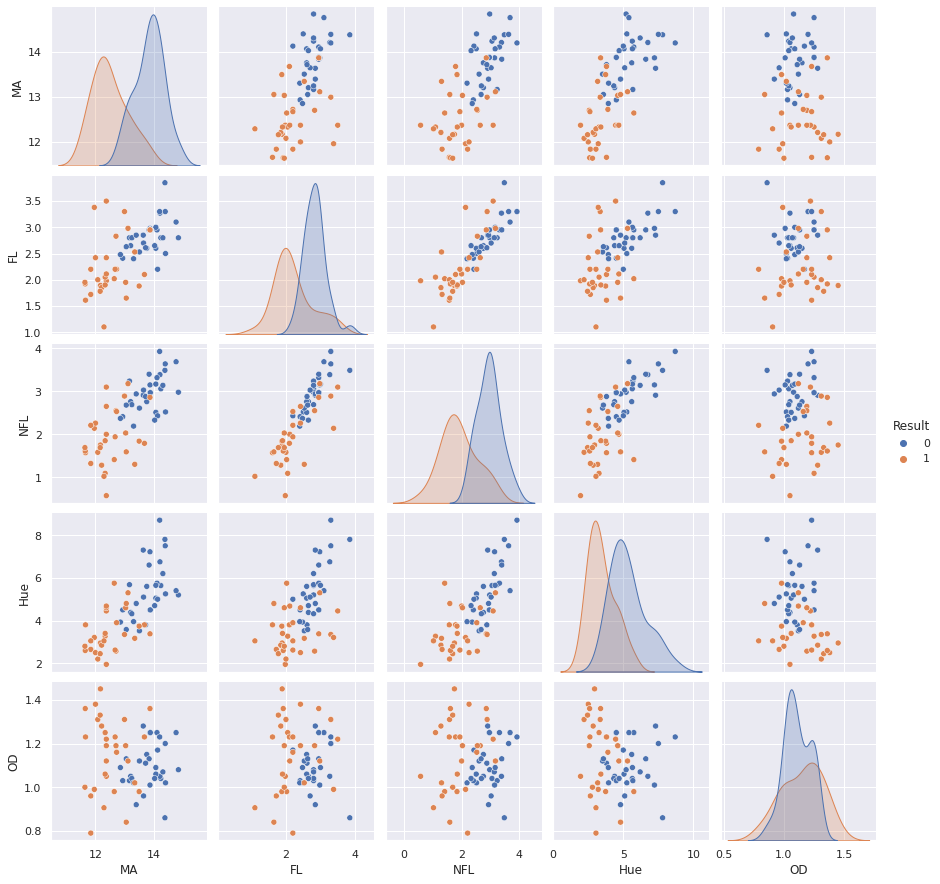

In [49]:
sns.pairplot(df, hue='Result')
plt.show()

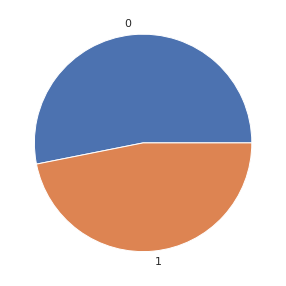

In [50]:
y =df['Result']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [51]:
X = df.drop(columns=['Result'])
X.head(10)

MA    FL   NFL   Hue    OD
0  14.23  2.80  3.06  5.64  1.04
1  13.20  2.65  2.76  4.38  1.05
2  13.16  2.80  3.24  5.68  1.03
3  14.37  3.85  3.49  7.80  0.86
4  13.24  2.80  2.69  4.32  1.04
5  14.20  3.27  3.39  6.75  1.05
6  14.39  2.50  2.52  5.25  1.02
7  14.06  2.60  2.51  5.05  1.06
8  14.83  2.80  2.98  5.20  1.08
9  13.86  2.98  3.15  7.22  1.01

In [52]:
X.describe().transpose()

count       mean       std    min      25%     50%      75%    max
MA    64.0  13.207812  0.863409  11.64  12.3700  13.270  13.8700  14.83
FL    64.0   2.538750  0.540175   1.10   2.0875   2.605   2.9500   3.85
NFL   64.0   2.465000  0.742567   0.57   1.8475   2.580   2.9725   3.93
Hue   64.0   4.450156  1.475404   1.95   3.3300   4.500   5.2625   8.70
OD    64.0   1.128375  0.140431   0.79   1.0300   1.120   1.2500   1.45

**Standardize the Data**

In [53]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

MA        FL       NFL       Hue        OD
0  1.193257  0.487463  0.807608  0.812828 -0.634289
1 -0.009120  0.207580  0.400411 -0.047926 -0.562517
2 -0.055814  0.487463  1.051927  0.840154 -0.706062
3  1.356687  2.446644  1.391258  2.288407 -1.926194
4  0.037574  0.487463  0.305398 -0.088915 -0.634289
5  1.158236  1.364430  1.255526  1.571112 -0.562517
6  1.380034 -0.072303  0.074653  0.546404 -0.777834
7  0.994806  0.114286  0.061080  0.409776 -0.490744
8  1.893670  0.487463  0.699022  0.512247 -0.347199
9  0.761335  0.823323  0.929768  1.892187 -0.849607

In [54]:
X.describe().transpose()

count          mean       std       min       25%       50%       75%  \
MA    64.0  7.667478e-16  1.007905 -1.830195 -0.978025  0.072595  0.773009   
FL    64.0  2.914335e-16  1.007905 -2.684545 -0.841982  0.123615  0.767346   
NFL   64.0  2.012279e-16  1.007905 -2.572131 -0.838148  0.156092  0.688842   
Hue   64.0  5.412337e-16  1.007905 -1.707953 -0.765222  0.034050  0.554943   
OD    64.0  7.494005e-16  1.007905 -2.428602 -0.706062 -0.060109  0.872933   

          max  
MA   1.893670  
FL   2.446644  
NFL  1.988481  
Hue  2.903232  
OD   2.308383

**Observations and variables**

In [55]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

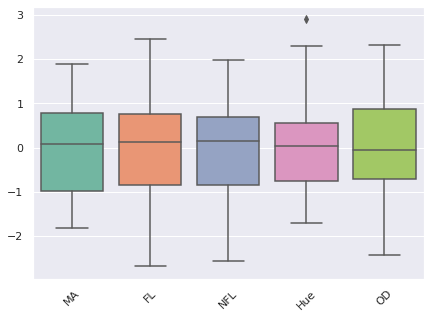

In [56]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

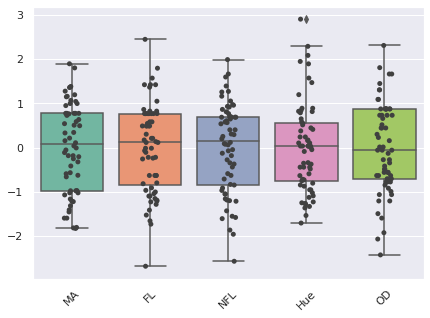

In [57]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

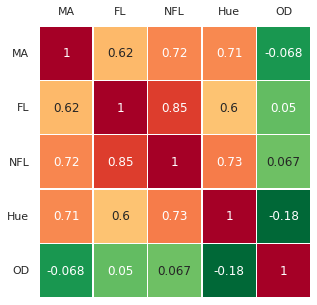

In [58]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

##**Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

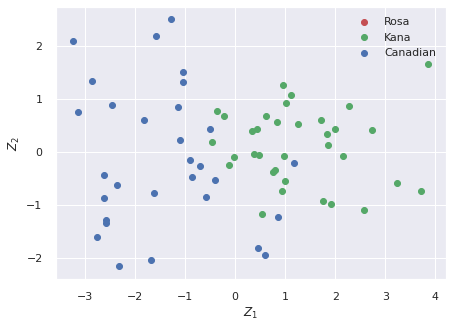

In [ ]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

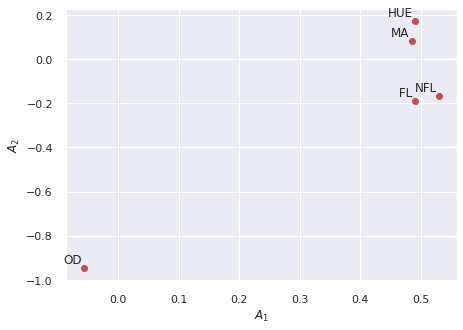

In [ ]:
A = pca.components_.T 
plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

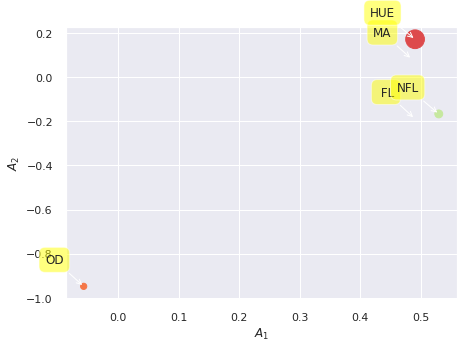

In [ ]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

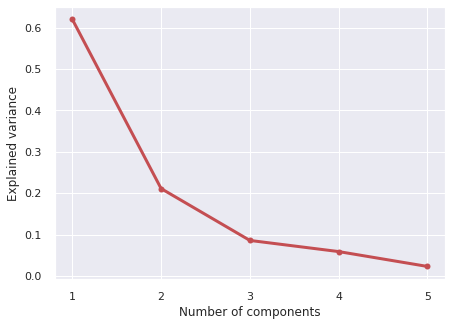

In [ ]:
#Eigenvalues
Lambda = pca.explained_variance_ 
#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

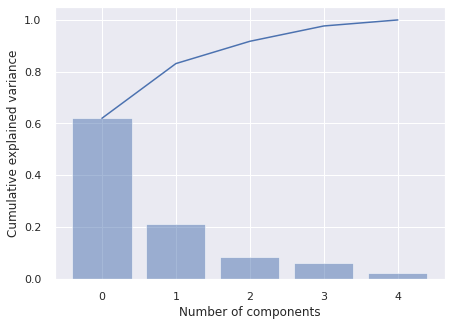

In [ ]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

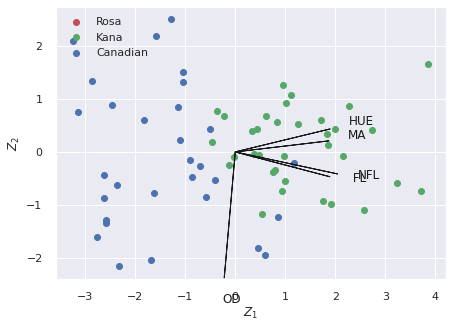

In [ ]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

##**Using PCA Library**

In [ ]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [4] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [ ]:
out['PC']

PC1       PC2       PC3       PC4
0   1.712555  0.596029 -0.304156 -0.275873
1   0.344185  0.396805  0.393311 -0.057516
2   1.250358  0.524448  0.445863  0.623997
3   3.862841  1.653830  0.804842  0.314944
4   0.437450  0.426783  0.562741 -0.179071
..       ...       ...       ...       ...
59 -1.578529  2.197401  1.448194  0.282905
60 -1.628824 -0.772825  0.021353 -0.384153
61 -2.583662 -1.335626 -0.403090  0.077650
62 -2.766858 -1.607434 -0.038904  0.520379
63 -2.469683  0.892006  0.733674  0.425709

[64 rows x 4 columns]

**Scatter plot**

[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].


(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb44e8b61f0>)

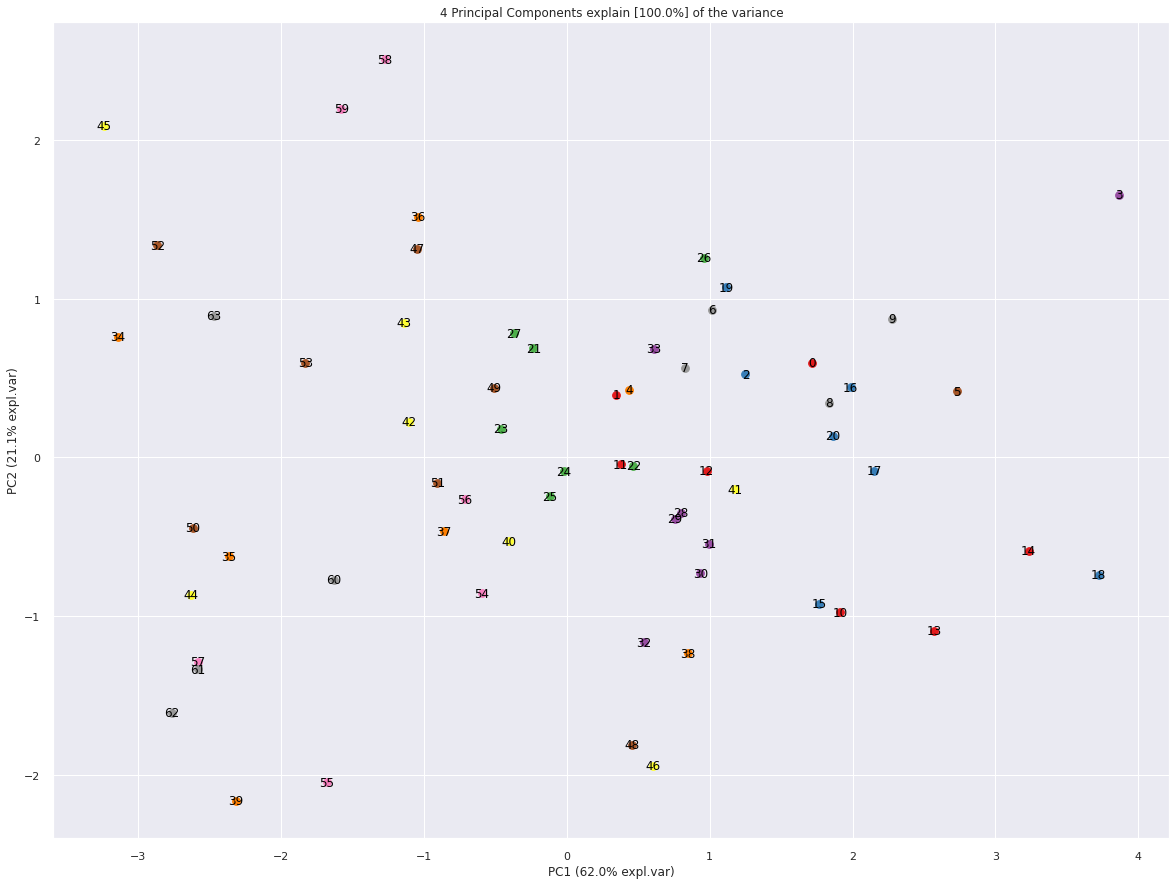

In [ ]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [ ]:
A = out['loadings'].T

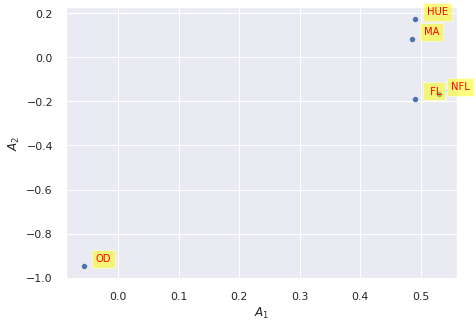

In [ ]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

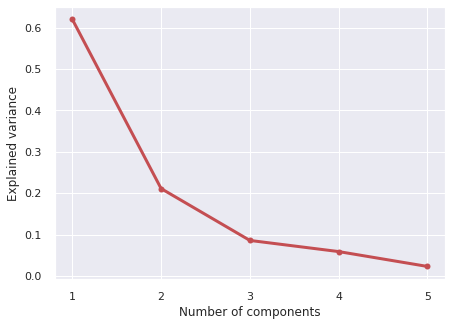

In [ ]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

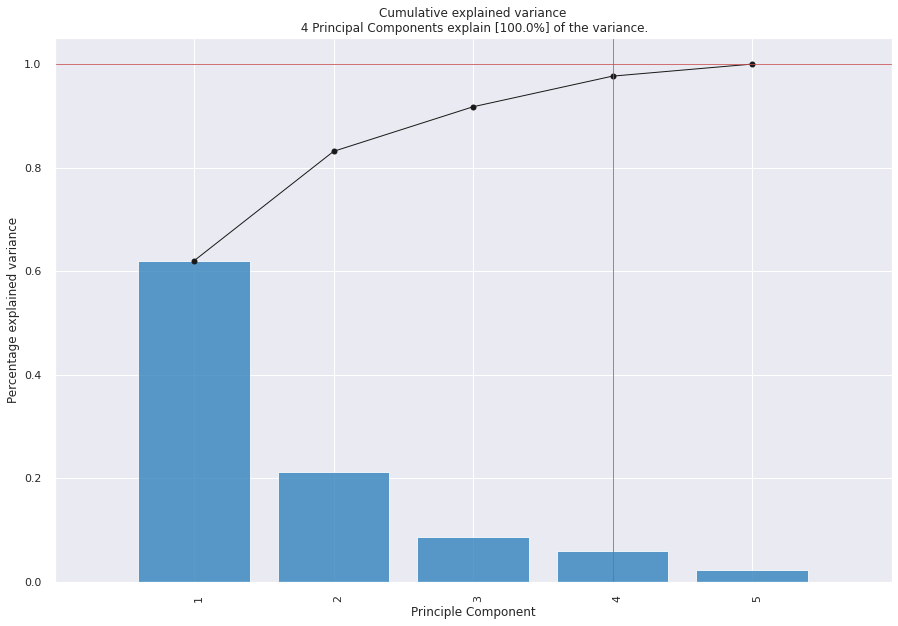

<Figure size 504x360 with 0 Axes>

In [ ]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].


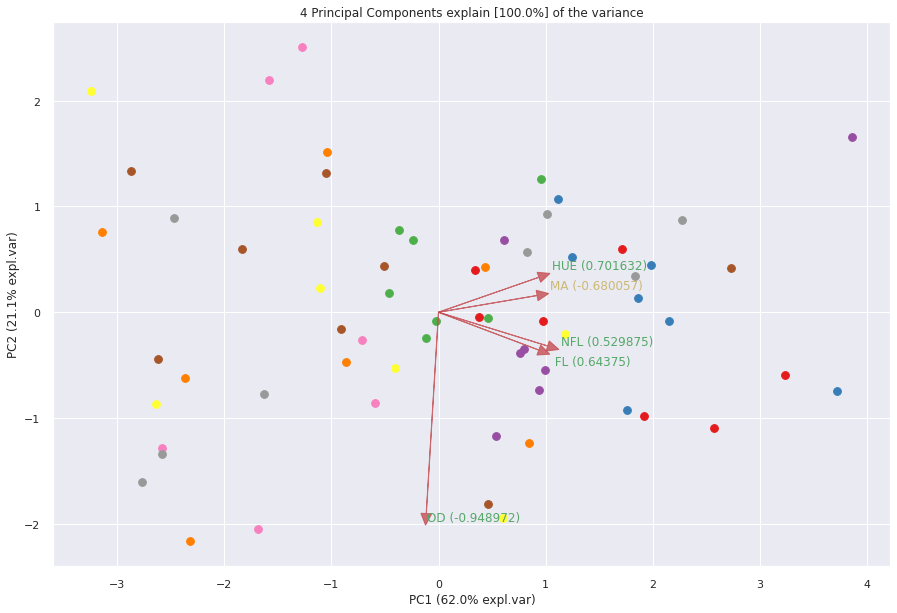

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb44ee03c70>)

In [ ]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [64] unique colors! Available unique colors: [9].


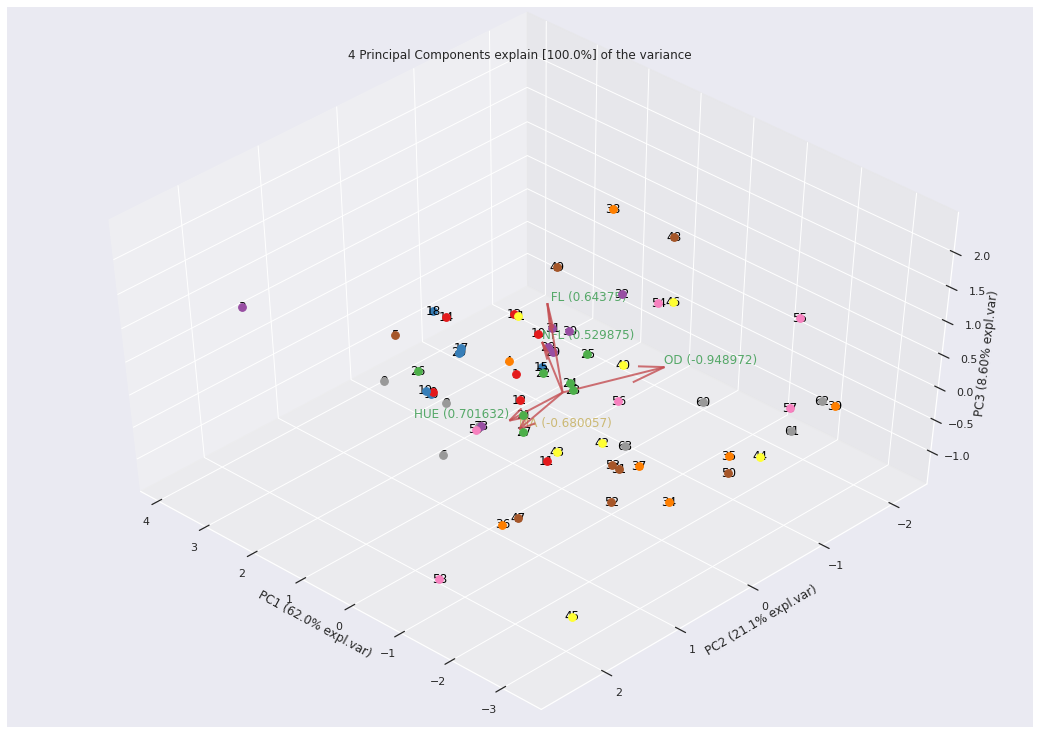

(<Figure size 1080x720 with 2 Axes>,
 <mpl_toolkits.mplot3d.axes3d.Axes3D at 0x7fb44ee93ac0>)

In [ ]:
model.biplot3d(legend=False)

#**Classification**

**Using PyCaret**

PyCaret uses interactive plotting ability. In order to render interactive plots in Google Colab, run the below line of code in your colab notebook.

In [ ]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In order to demonstrate the predict_model() function on unseen data, a sample of 21 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 21 records were not available at the time when the machine learning experiment was performed.

In [ ]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (58, 6)
Unseen Data For Predictions: (6, 6)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline (we will see them in later tutorials).

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [ ]:
from pycaret.classification import *

clf = setup(data=data, target='Result', train_size=0.7, session_id=123)

Description             Value
0                               session_id               123
1                                   Target            Result
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (58, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (40, 5)
12                    Transformed Test Set           (18, 5)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              4e7c
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize             False
30                        Normalize Method              None
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA             False
34                              PCA Method              None
35                          PCA Components              None
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('scaling', 'passthrough'), ('P_transform', 'passthrough'),
                ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                ('cluste

**Comparing All Models**

In [ ]:
 #show the best model and their statistics
 best_model = compare_models() 

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes     0.925  1.0000  0.9500  0.9333   
et                 Extra Trees Classifier     0.900  0.9750  0.9333  0.9333   
lr                    Logistic Regression     0.875  1.0000  0.8667  0.9333   
ridge                    Ridge Classifier     0.875  0.0000  0.9167  0.9000   
rf               Random Forest Classifier     0.875  0.9375  0.9000  0.8833   
gbc          Gradient Boosting Classifier     0.875  0.8667  0.8667  0.9333   
lda          Linear Discriminant Analysis     0.875  0.9667  0.9167  0.9000   
knn                K Neighbors Classifier     0.850  0.9375  1.0000  0.8000   
dt               Decision Tree Classifier     0.850  0.8583  0.8667  0.8833   
qda       Quadratic Discriminant Analysis     0.850  0.9750  0.8667  0.8833   
ada                  Ada Boost Classifier     0.775  0.9500  0.7833  0.8500   
svm                   SVM - Linear Kernel     0.675  0.0000  0.6333  0.7500   
lightgbm  Light Gradient Boosting Machine     0.525  0.5000  1.0000  0.5250   
dummy                    Dummy Classifier     0.525  0.5000  1.0000  0.5250   

              F1  Kappa     MCC  TT (Sec)  
nb        0.9267   0.85  0.8732     0.010  
et        0.9100   0.82  0.8488     0.145  
lr        0.8733   0.75  0.7887     0.271  
ridge     0.8867   0.75  0.7887     0.010  
rf        0.8767   0.75  0.7732     0.172  
gbc       0.8733   0.75  0.7887     0.052  
lda       0.8867   0.75  0.7887     0.011  
knn       0.8800   0.70  0.7464     0.018  
dt        0.8567   0.70  0.7309     0.011  
qda       0.8567   0.70  0.7309     0.011  
ada       0.7733   0.57  0.6220     0.077  
svm       0.6333   0.37  0.4065     0.012  
lightgbm  0.6857   0.00  0.0000     0.096  
dummy     0.6857   0.00  0.0000     0.010

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model

GaussianNB(priors=None, var_smoothing=1e-09)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

* Decision Tree Classifier ('dt')
* K Neighbors Classifier ('knn')
* Logistic Regression ('lr')

There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**

In [ ]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.8333  0.6667  1.0000  0.8000  0.5000  0.5774
1       0.7500  0.7500  1.0000  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
3       0.7500  0.7500  0.5000  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.7500  0.7500  1.0000  0.6667  0.8000  0.5000  0.5774
7       0.5000  0.5000  0.5000  0.5000  0.5000  0.0000  0.0000
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.8500  0.8583  0.8667  0.8833  0.8567  0.7000  0.7309
SD      0.1658  0.1627  0.2082  0.1833  0.1660  0.3317  0.3147

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune a Model:** How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [ ]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1  Kappa     MCC
0       0.5000  0.6667  0.3333  1.0000  0.5000  0.200  0.3333
1       0.7500  1.0000  1.0000  0.6667  0.8000  0.500  0.5774
2       1.0000  1.0000  1.0000  1.0000  1.0000  1.000  1.0000
3       0.7500  1.0000  0.5000  1.0000  0.6667  0.500  0.5774
4       1.0000  1.0000  1.0000  1.0000  1.0000  1.000  1.0000
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.000  1.0000
6       0.7500  0.7500  1.0000  0.6667  0.8000  0.500  0.5774
7       0.7500  0.6250  0.5000  1.0000  0.6667  0.500  0.5774
8       1.0000  1.0000  1.0000  1.0000  1.0000  1.000  1.0000
9       0.7500  1.0000  1.0000  0.6667  0.8000  0.500  0.5774
Mean    0.8250  0.9042  0.8333  0.9000  0.8233  0.670  0.7220
SD      0.1601  0.1491  0.2582  0.1528  0.1674  0.283  0.2377

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

Update statmodels

In [ ]:
!pip install statsmodels --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


How to analyze model performance using various plots

In [ ]:
evaluate_model(tuned_dt)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [ ]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.     F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.000  1.0000  1.0000
1       0.7500  0.7500     1.0  0.6667  0.800  0.5000  0.5774
2       1.0000  1.0000     1.0  1.0000  1.000  1.0000  1.0000
3       0.7500  0.8750     1.0  0.6667  0.800  0.5000  0.5774
4       1.0000  1.0000     1.0  1.0000  1.000  1.0000  1.0000
5       1.0000  1.0000     1.0  1.0000  1.000  1.0000  1.0000
6       0.7500  1.0000     1.0  0.6667  0.800  0.5000  0.5774
7       0.7500  0.8750     1.0  0.6667  0.800  0.5000  0.5774
8       0.7500  0.8750     1.0  0.6667  0.800  0.5000  0.5774
9       0.7500  1.0000     1.0  0.6667  0.800  0.5000  0.5774
Mean    0.8500  0.9375     1.0  0.8000  0.880  0.7000  0.7464
SD      0.1225  0.0839     0.0  0.1633  0.098  0.2449  0.2071

INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')
INFO:logs:create_model() succesfully completed......................................


**Tune K Neighbors Model**

In [ ]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,30,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.8750    1.00  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
3       0.7500  0.7500    1.00  0.6667  0.8000  0.5000  0.5774
4       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
7       0.7500  0.7500    0.50  1.0000  0.6667  0.5000  0.5774
8       1.0000  1.0000    1.00  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0000    1.00  0.6667  0.8000  0.5000  0.5774
Mean    0.9000  0.9375    0.95  0.9000  0.9067  0.8000  0.8309
SD      0.1225  0.1008    0.15  0.1528  0.1200  0.2449  0.2071

INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
                     weights='uniform')
INFO:logs:tune_model() succesfully completed......................................


**Evaluate K Neighbors Model**

In [ ]:
evaluate_model(tuned_knn)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=27, p=2,
                     weights='uniform'), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [ ]:
nb = create_model('nb')

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
3       0.7500  1.0    0.50  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
Mean    0.9250  1.0    0.95  0.9333  0.9267  0.8500  0.8732
SD      0.1146  0.0    0.15  0.1333  0.1172  0.2291  0.1937

INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_nb = tune_model(nb)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
3       0.7500  1.0    0.50  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
Mean    0.9250  1.0    0.95  0.9333  0.9267  0.8500  0.8732
SD      0.1146  0.0    0.15  0.1333  0.1172  0.2291  0.1937

INFO:logs:create_model_container: 24
INFO:logs:master_model_container: 24
INFO:logs:display_container: 12
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_model(tuned_nb)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
et = create_model('et')

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  1.000  0.3333  1.0000  0.5000  0.2000  0.3333
1       0.7500  0.750  1.0000  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.000  1.0000  0.6667  0.8000  0.5000  0.5774
Mean    0.9000  0.975  0.9333  0.9333  0.9100  0.8200  0.8488
SD      0.1658  0.075  0.2000  0.1333  0.1578  0.2857  0.2394

INFO:logs:create_model_container: 26
INFO:logs:master_model_container: 26
INFO:logs:display_container: 14
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_et = tune_model(et)

Accuracy  AUC  Recall   Prec.    F1  Kappa     MCC
0         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
1         0.75  1.0     1.0  0.6667  0.80    0.5  0.5774
2         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
3         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
4         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
5         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
6         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
7         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
8         1.00  1.0     1.0  1.0000  1.00    1.0  1.0000
9         0.75  1.0     1.0  0.6667  0.80    0.5  0.5774
Mean      0.95  1.0     1.0  0.9333  0.96    0.9  0.9155
SD        0.10  0.0     0.0  0.1333  0.08    0.2  0.1691

INFO:logs:create_model_container: 27
INFO:logs:master_model_container: 27
INFO:logs:display_container: 15
INFO:logs:ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
evaluate_model(tuned_et)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_impurity_split=None, min_samples_leaf=6,
                     min_samples_split=9, min_weight_fraction_leaf=0.0,
                     n_estimators=190, n_jobs=-1, oob_score=False,
                     random_state=123, verbose=0, warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
lr = create_model('lr')

Accuracy  AUC  Recall   Prec.      F1  Kappa     MCC
0        0.750  1.0  0.6667  1.0000  0.8000   0.50  0.5774
1        0.750  1.0  1.0000  0.6667  0.8000   0.50  0.5774
2        1.000  1.0  1.0000  1.0000  1.0000   1.00  1.0000
3        0.750  1.0  0.5000  1.0000  0.6667   0.50  0.5774
4        1.000  1.0  1.0000  1.0000  1.0000   1.00  1.0000
5        1.000  1.0  1.0000  1.0000  1.0000   1.00  1.0000
6        1.000  1.0  1.0000  1.0000  1.0000   1.00  1.0000
7        0.750  1.0  0.5000  1.0000  0.6667   0.50  0.5774
8        1.000  1.0  1.0000  1.0000  1.0000   1.00  1.0000
9        0.750  1.0  1.0000  0.6667  0.8000   0.50  0.5774
Mean     0.875  1.0  0.8667  0.9333  0.8733   0.75  0.7887
SD       0.125  0.0  0.2082  0.1333  0.1348   0.25  0.2113

INFO:logs:create_model_container: 28
INFO:logs:master_model_container: 28
INFO:logs:display_container: 16
INFO:logs:LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Logistic Regression Model**

In [ ]:
tuned_lr = tune_model(lr)

Accuracy   AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
1       0.7500  1.00     1.0  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
3       0.7500  0.75     1.0  0.6667  0.8000  0.5000  0.5774
4       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
7       0.7500  0.75     0.5  1.0000  0.6667  0.5000  0.5774
8       0.7500  1.00     0.5  1.0000  0.6667  0.5000  0.5774
9       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
Mean    0.9000  0.95     0.9  0.9333  0.8933  0.8000  0.8309
SD      0.1225  0.10     0.2  0.1333  0.1373  0.2449  0.2071

INFO:logs:create_model_container: 29
INFO:logs:master_model_container: 29
INFO:logs:display_container: 17
INFO:logs:LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Logistic Regression Model**

In [ ]:
evaluate_model(tuned_lr)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LogisticRegression(C=0.056, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [ ]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.6250     1.0  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
3       0.7500  1.0000     0.5  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
7       0.5000  0.7500     0.5  0.5000  0.5000  0.0000  0.0000
8       1.0000  1.0000     1.0  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0000     1.0  0.6667  0.8000  0.5000  0.5774
Mean    0.8750  0.9375     0.9  0.8833  0.8767  0.7500  0.7732
SD      0.1677  0.1281     0.2  0.1833  0.1700  0.3354  0.3196

INFO:logs:create_model_container: 30
INFO:logs:master_model_container: 30
INFO:logs:display_container: 18
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


**Tune Random Forest Model**

In [ ]:
tuned_rf = tune_model(rf)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
3       0.7500  1.0    0.50  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
6       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
7       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
Mean    0.9000  1.0    0.95  0.9000  0.9067  0.8000  0.8309
SD      0.1225  0.0    0.15  0.1528  0.1200  0.2449  0.2071

INFO:logs:create_model_container: 31
INFO:logs:master_model_container: 31
INFO:logs:display_container: 19
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.3, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**Evaluate Random Forest Model**

In [ ]:
evaluate_model(tuned_rf)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=7, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.3, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=140,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy  AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
1       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
3       0.7500  1.0    0.50  1.0000  0.6667  0.5000  0.5774
4       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
7       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
8       1.0000  1.0    1.00  1.0000  1.0000  1.0000  1.0000
9       0.7500  1.0    1.00  0.6667  0.8000  0.5000  0.5774
Mean    0.9250  1.0    0.95  0.9333  0.9267  0.8500  0.8732
SD      0.1146  0.0    0.15  0.1333  0.1172  0.2291  0.1937

INFO:logs:create_model_container: 32
INFO:logs:master_model_container: 32
INFO:logs:display_container: 20
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model

GaussianNB(priors=None, var_smoothing=2e-09)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

#**Classification + PCA**

In [ ]:
clf_pca = setup(data=data, target='Result', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description             Value
0                               session_id               123
1                                   Target            Result
2                              Target Type            Binary
3                            Label Encoded              None
4                            Original Data           (58, 6)
5                           Missing Values             False
6                         Numeric Features                 5
7                     Categorical Features                 0
8                         Ordinal Features             False
9                High Cardinality Features             False
10                 High Cardinality Method              None
11                   Transformed Train Set           (40, 3)
12                    Transformed Test Set           (18, 3)
13                      Shuffle Train-Test              True
14                     Stratify Train-Test             False
15                          Fold Generator   StratifiedKFold
16                             Fold Number                10
17                                CPU Jobs                -1
18                                 Use GPU             False
19                          Log Experiment             False
20                         Experiment Name  clf-default-name
21                                     USI              f108
22                         Imputation Type            simple
23          Iterative Imputation Iteration              None
24                         Numeric Imputer              mean
25      Iterative Imputation Numeric Model              None
26                     Categorical Imputer          constant
27  Iterative Imputation Categorical Model              None
28           Unknown Categoricals Handling    least_frequent
29                               Normalize              True
30                        Normalize Method            zscore
31                          Transformation             False
32                   Transformation Method              None
33                                     PCA              True
34                              PCA Method            linear
35                          PCA Components                 3
36                     Ignore Low Variance             False
37                     Combine Rare Levels             False
38                    Rare Level Threshold              None
39                         Numeric Binning             False
40                         Remove Outliers             False
41                      Outliers Threshold              None
42                Remove Multicollinearity             False
43             Multicollinearity Threshold              None
44             Remove Perfect Collinearity              True
45                              Clustering             False
46                    Clustering Iteration              None
47                     Polynomial Features             False
48                       Polynomial Degree              None
49                    Trignometry Features             False
50                    Polynomial Threshold              None
51                          Group Features             False
52                       Feature Selection             False
53                Feature Selection Method           classic
54            Features Selection Threshold              None
55                     Feature Interaction             False
56                           Feature Ratio             False
57                   Interaction Threshold              None
58                           Fix Imbalance             False
59                    Fix Imbalance Method             SMOTE

INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='Result',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_strat...
                ('dummy', Dummify(target='Result')),
                ('fix_perfect', Remove_100(target='Result')),
                ('clean_names', Clean_Colum_Names()),
     

In [ ]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
nb                            Naive Bayes     0.950  0.9750  0.9667  0.9667   
dt               Decision Tree Classifier     0.925  0.9333  0.9667  0.9333   
qda       Quadratic Discriminant Analysis     0.925  1.0000  0.9167  0.9667   
gbc          Gradient Boosting Classifier     0.925  0.9208  0.9667  0.9333   
lr                    Logistic Regression     0.900  1.0000  0.9000  0.9333   
knn                K Neighbors Classifier     0.900  0.9625  1.0000  0.8667   
rf               Random Forest Classifier     0.900  0.9750  0.9167  0.9167   
et                 Extra Trees Classifier     0.900  0.9250  0.9667  0.9000   
svm                   SVM - Linear Kernel     0.875  0.0000  0.8500  0.9333   
ada                  Ada Boost Classifier     0.875  0.9167  0.9333  0.9000   
ridge                    Ridge Classifier     0.850  0.0000  0.8667  0.9000   
lda          Linear Discriminant Analysis     0.850  0.9667  0.8667  0.9000   
lightgbm  Light Gradient Boosting Machine     0.525  0.5000  1.0000  0.5250   
dummy                    Dummy Classifier     0.525  0.5000  1.0000  0.5250   

              F1   Kappa     MCC  TT (Sec)  
nb        0.9600  0.9000  0.9155     0.011  
dt        0.9400  0.8500  0.8732     0.009  
qda       0.9267  0.8500  0.8732     0.012  
gbc       0.9400  0.8500  0.8732     0.042  
lr        0.8933  0.8000  0.8309     0.013  
knn       0.9200  0.8000  0.8309     0.030  
rf        0.9100  0.8000  0.8155     0.172  
et        0.9200  0.8000  0.8309     0.133  
svm       0.8600  0.7500  0.7887     0.011  
ada       0.8900  0.7700  0.8065     0.078  
ridge     0.8600  0.6667  0.6976     0.009  
lda       0.8600  0.6667  0.6976     0.010  
lightgbm  0.6857  0.0000  0.0000     0.100  
dummy     0.6857  0.0000  0.0000     0.011

INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GaussianNB(priors=None, var_smoothing=1e-09)
INFO:logs:compare_models() succesfully completed......................................


In [ ]:
best_model_pca

GaussianNB(priors=None, var_smoothing=1e-09)

**Tune the Best Model**

In [ ]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy    AUC  Recall   Prec.    F1  Kappa     MCC
0         0.75  1.000  0.6667  1.0000  0.80    0.5  0.5774
1         0.75  0.750  1.0000  0.6667  0.80    0.5  0.5774
2         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
3         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
4         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
5         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
6         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
7         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
8         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
9         1.00  1.000  1.0000  1.0000  1.00    1.0  1.0000
Mean      0.95  0.975  0.9667  0.9667  0.96    0.9  0.9155
SD        0.10  0.075  0.1000  0.1000  0.08    0.2  0.1691

INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:GaussianNB(priors=None, var_smoothing=2e-09)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
tuned_best_model_pca

GaussianNB(priors=None, var_smoothing=2e-09)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [ ]:
evaluate_model(tuned_best_model_pca)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=GaussianNB(priors=None, var_smoothing=2e-09), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Note:** The AUC metric is not available for Multiclass classification however the column will still be shown with zero values to maintain consistency between the Binary Classification and Multiclass Classification display grids.

#**Explainable AI with Shapley values**



In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print("Numpy version: ", np.__version__)

Numpy version:  1.21.6


In [ ]:
!pip install numba==0.53

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.4 MB 15.3 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.39.1
    Uninstalling llvmlite-0.39.1:
      Successfully uninstalled llvmlite-0.39.1
  Attempting uninstall: numba
    Found existing installation: numba 0.56.4
    Uninstalling numba-0.56.4:
      Successfully uninstalled numba-0.56.4


In [ ]:
import shap

In [ ]:
rf_pca = create_model('rf')

Accuracy    AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  1.000  0.6667  1.0000  0.8000  0.5000  0.5774
1       0.5000  0.750  0.5000  0.5000  0.5000  0.0000  0.0000
2       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
7       0.7500  1.000  1.0000  0.6667  0.8000  0.5000  0.5774
8       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
9       1.0000  1.000  1.0000  1.0000  1.0000  1.0000  1.0000
Mean    0.9000  0.975  0.9167  0.9167  0.9100  0.8000  0.8155
SD      0.1658  0.075  0.1708  0.1708  0.1578  0.3317  0.3189

INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy   AUC  Recall   Prec.      F1   Kappa     MCC
0       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
1       0.7500  0.75     1.0  0.6667  0.8000  0.5000  0.5774
2       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
3       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
4       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
5       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
6       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
7       0.7500  1.00     1.0  0.6667  0.8000  0.5000  0.5774
8       1.0000  1.00     1.0  1.0000  1.0000  1.0000  1.0000
9       0.7500  0.75     1.0  0.6667  0.8000  0.5000  0.5774
Mean    0.9250  0.95     1.0  0.9000  0.9400  0.8500  0.8732
SD      0.1146  0.10     0.0  0.1528  0.0917  0.2291  0.1937

INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples. 

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


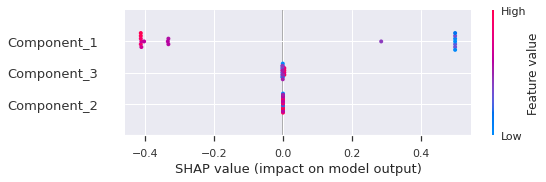

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=32, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


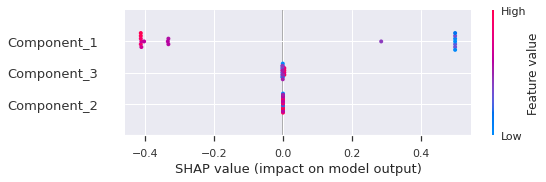

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary', observation=32)

From the above the plot, we can seethe "base value," which is defined as the mean predicted target; and f(x), which is the prediction for a selected observation (i.e. observation number 32). The red-colored features increased the predicted value, while the blue-colored features decreased it. The size of each feature (i.e. Principal Component) indicates the impact it has on the model.

**Visualize many predictions**

INFO:logs:Initializing interpret_model()
INFO:logs:interpret_model(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=9, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                       warm_start=False), use_train_data=False, X_new_sample=None, y_new_sample=None, feature=None, kwargs={}, observation=None, plot=summary, save=False)
INFO:logs:Checking exceptions
INFO:logs:plot type: summary
INFO:logs:Creating TreeExplainer
INFO:logs:Compiling shap values


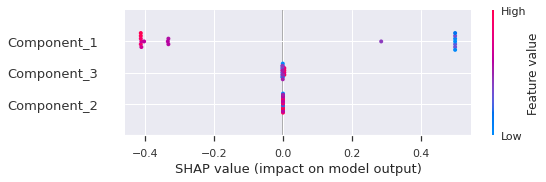

INFO:logs:Visual Rendered Successfully
INFO:logs:interpret_model() succesfully completed......................................


In [ ]:
interpret_model(tuned_rf_pca, plot='summary')